In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/dataset_traveloHI/Dataset/train'
test_dir = '/content/drive/MyDrive/dataset_traveloHI/Dataset/test'
val_dir = '/content/drive/MyDrive/dataset_traveloHI/Dataset/valid/valid'
train_df = pd.read_csv('/content/drive/MyDrive/dataset_traveloHI/Dataset/train/_classes.csv')
test_df = pd.read_csv('/content/drive/MyDrive/dataset_traveloHI/Dataset/test/_classes.csv')
val_df = pd.read_csv('/content/drive/MyDrive/dataset_traveloHI/Dataset/valid/valid/_classes.csv')

In [ ]:
train_df = train_df.rename(columns=lambda x: x.strip())
test_df = test_df.rename(columns=lambda x: x.strip())
val_df = val_df.rename(columns=lambda x: x.strip())

In [ ]:
print(list(train_df.columns)[1:])
print(list(test_df.columns)[1:])
print(list(val_df.columns)[1:])

['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States', 'Unlabeled']
['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States', 'Unlabeled']
['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States', 'Unlabeled']


In [ ]:
#Hapus baris yang dan juga kolom yang unlabeled

train_df = train_df[train_df['Unlabeled'] != 1]
train_df = train_df.drop(columns=['Unlabeled'])

test_df = test_df[test_df['Unlabeled'] != 1]
test_df = test_df.drop(columns=['Unlabeled'])

val_df = val_df[val_df['Unlabeled'] != 1]
val_df = val_df.drop(columns=['Unlabeled'])

print(list(train_df.columns)[1:])
print(list(test_df.columns)[1:])
print(list(val_df.columns)[1:])

['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States']
['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States']
['Brazil', 'Canada', 'Finland', 'Japan', 'United-Kingdom', 'United_States']


In [ ]:
def get_label(row):
  for column in train_df.columns[1:]:
    if row[column] == 1:
      return column

In [ ]:
train_df['label'] = train_df.apply(get_label, axis=1)
test_df['label'] = test_df.apply(get_label, axis=1)
val_df['label'] = val_df.apply(get_label, axis=1)

train_df.drop(train_df.columns[1:-1], axis=1, inplace=True)
test_df.drop(test_df.columns[1:-1], axis=1, inplace=True)
val_df.drop(val_df.columns[1:-1], axis=1, inplace=True)

train_df.head()
test_df.head()
val_df.head()

,filename,label
0,canvas_1630134076_jpg.rf.0016e05fc88098bedd8b7...,Brazil
1,canvas_1630273838_jpg.rf.0068c184c67fe7f520cbc...,Brazil
2,canvas_1629262184_jpg.rf.00cc45f3f6500cce41378...,United_States
3,canvas_1629746307_jpg.rf.0145f2ebe6b9ba4b98a82...,Canada
4,canvas_1629757070_jpg.rf.008dc47158413d546fdb4...,United-Kingdom


In [ ]:
def custom_preprocess(image):
  image = cv2.resize(image, (224, 224)) #resize image jadi 224x224
  return image


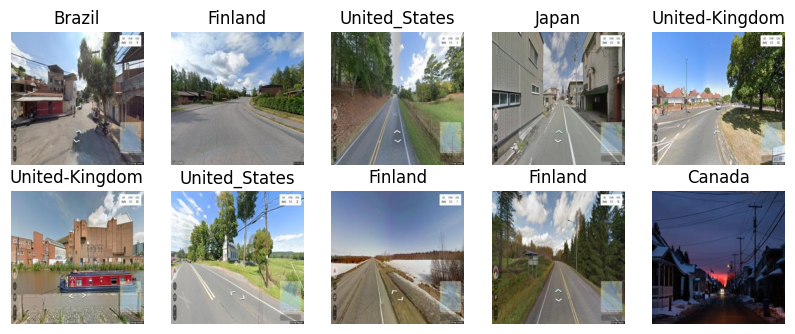

In [ ]:
plt.figure(figsize=(10, 10))
for i, (index, row) in enumerate(train_df.head(10).iterrows()):
  image_path = row['filename']
  label = row['label']

  image = Image.open(train_dir+'/'+image_path)
  ax = plt.subplot(5, 5, i + 1)
  ax.set_title(label)
  plt.imshow(image)
  plt.axis('off')


In [ ]:
train_datagen = ImageDataGenerator(
  preprocessing_function=custom_preprocess,
  rescale=1./255, #normalisasi range pixelnya jadi 0-1
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  brightness_range=[0.8, 1.2],
)

test_datagen = ImageDataGenerator(
  preprocessing_function=custom_preprocess,
  rescale=1./255 #normalisasi range pixelnya jadi 0-1
)

val_datagen = ImageDataGenerator(
  preprocessing_function=custom_preprocess,
  rescale=1./255 #normalisasi range pixelnya jadi 0-1
)


In [ ]:
HEIGHT = 224
WIDTH = 224
EPOCHS = 5
BATCH_SIZE = 32

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
              dataframe=train_df,
              directory=train_dir,
              x_col='filename',
              y_col='label',
              target_size=(HEIGHT, WIDTH), #Ubah img size jadi 224x224
              batch_size=BATCH_SIZE,
              shuffle=True,
              class_mode='categorical',
              )

test_gen = test_datagen.flow_from_dataframe(
              dataframe=test_df,
              directory=test_dir,
              x_col='filename',
              y_col='label',
              target_size=(HEIGHT, WIDTH),
              shuffle=False,
              class_mode='categorical'
              )

val_gen = val_datagen.flow_from_dataframe(
              dataframe=val_df,
              directory=val_dir,
              x_col='filename',
              y_col='label',
              target_size=(HEIGHT, WIDTH),
              batch_size=BATCH_SIZE,
              shuffle=True,
              class_mode='categorical'
              )

Found 6140 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 91 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 815 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 79 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Found 1779 validated image filenames belonging to 6 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 3 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


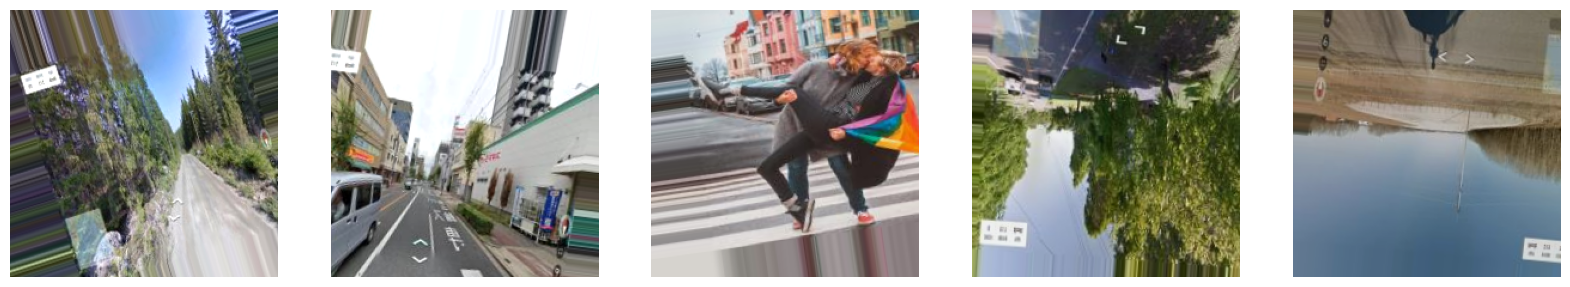

In [ ]:
num_images_to_display = 5

plt.figure(figsize=(20, 20))

images, labels = train_gen.next()

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i])
    plt.axis('off')

plt.show()

In [ ]:
def create_alexnet_model(input_shape, num_classes):
  model = Sequential()
  model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
  model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
  model.add(Flatten())
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return model

In [ ]:
input_shape = (HEIGHT, WIDTH, 3)
num_classes = 6

In [ ]:
#Create model
alexnet_model = create_alexnet_model(input_shape, num_classes)
alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         1

In [ ]:
# Compile the model
alexnet_model.compile(loss='categorical_crossentropy',
                      optimizer=Adam(lr=0.001),
                      metrics=['accuracy'])

In [ ]:
# Define callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.00001)

In [21]:
# Train the model with callbacks
history = alexnet_model.fit(train_gen,
                             steps_per_epoch=len(train_gen),
                             epochs=EPOCHS,
                             validation_data=val_gen,
                             validation_steps=len(val_gen),
                             callbacks=[early_stopping, reduce_lr])


Epoch 1/5
192/192 [==============================] - 4037s 21s/step - loss: 1.7931 - accuracy: 0.1664 - val_loss: 1.7919 - val_accuracy: 0.1669 - lr: 0.0010
Epoch 2/5
192/192 [==============================] - 581s 3s/step - loss: 1.7926 - accuracy: 0.1655 - val_loss: 1.7919 - val_accuracy: 0.1675 - lr: 0.0010
Epoch 3/5
192/192 [==============================] - 582s 3s/step - loss: 1.7923 - accuracy: 0.1669 - val_loss: 1.7921 - val_accuracy: 0.1686 - lr: 0.0010
Epoch 4/5
192/192 [==============================] - 582s 3s/step - loss: 1.7920 - accuracy: 0.1718 - val_loss: 1.7920 - val_accuracy: 0.1686 - lr: 1.0000e-04
Epoch 5/5
192/192 [==============================] - 578s 3s/step - loss: 1.7917 - accuracy: 0.1712 - val_loss: 1.7919 - val_accuracy: 0.1686 - lr: 1.0000e-04


In [22]:
# Evaluate the model on the test set
test_loss, test_accuracy = alexnet_model.evaluate(test_gen, steps=len(test_gen))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

26/26 [==============================] - 499s 20s/step - loss: 1.7904 - accuracy: 0.1840
Test Loss: 1.7904430627822876
Test Accuracy: 0.1840490847826004


In [23]:
from sklearn.metrics import confusion_matrix

predictions = alexnet_model.predict(test_gen, steps=len(test_gen))
y_true = test_gen.classes

y_pred = np.argmax(predictions, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)
print("Accuracy:", accuracy)

26/26 [==============================] - 30s 1s/step
Confusion Matrix:
[[  0   0   0   0   0 111]
 [  0   0   0   0   0 121]
 [  0   0   0   0   0 124]
 [  0   0   0   0   0 160]
 [  0   0   0   0   0 149]
 [  0   0   0   0   0 150]]
Accuracy: 0.18404907975460122


In [24]:
alexnet_model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
